In [429]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt


In [430]:

data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [431]:
data1 = data.drop(['Title', 'Genre', 'Description', 
           'Director', 'Actors', 'Rank'], axis=1)
def clean_dataset(df): .#чистим датасет от мусора 
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
data1 = clean_dataset(data1)
data1

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,2014.0,121.0,8.1,757074.0,333.13,76.0
1,2012.0,124.0,7.0,485820.0,126.46,65.0
2,2016.0,117.0,7.3,157606.0,138.12,62.0
3,2016.0,108.0,7.2,60545.0,270.32,59.0
4,2016.0,123.0,6.2,393727.0,325.02,40.0
...,...,...,...,...,...,...
993,2010.0,97.0,5.9,140900.0,60.13,37.0
994,2012.0,88.0,6.7,164088.0,54.72,48.0
996,2007.0,94.0,5.5,73152.0,17.54,46.0
997,2008.0,98.0,6.2,70699.0,58.01,50.0


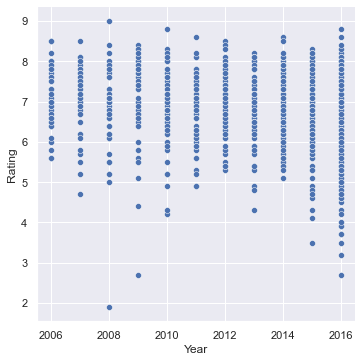

In [432]:
sns.set_theme()
sns.relplot( #тут графики делаем, чтобы посмотреть хоть какие - то зависимости 
    data=data,
    x="Year", y="Rating",
)

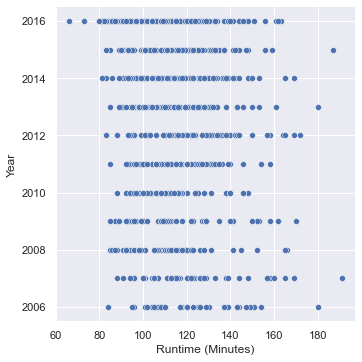

In [433]:

sns.relplot(
    data=data,
    x="Runtime (Minutes)", y="Year",
)

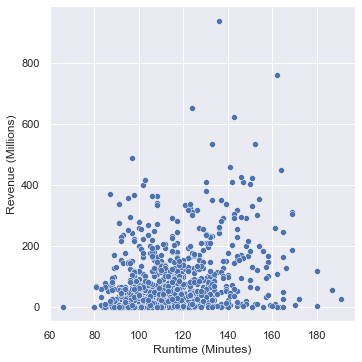

In [434]:

sns.relplot(
    data=data,
    x="Runtime (Minutes)", y="Revenue (Millions)",
)

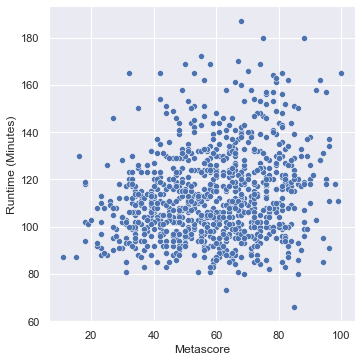

In [435]:

sns.relplot(
    data=data,
    y="Runtime (Minutes)", x="Metascore",
)

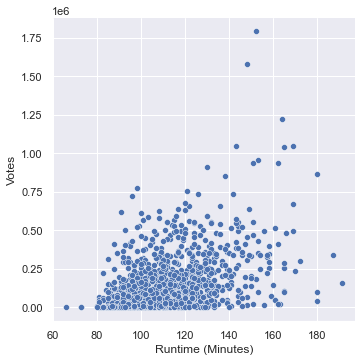

In [436]:

sns.relplot(
    data=data,
    x="Runtime (Minutes)", y="Votes",
)

In [437]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV

In [438]:
fit_data = data1[['Rating', 'Year', 'Revenue (Millions)', 'Metascore']] # на основе графиков выбрали данные для обучения
X = fit_data.values 
display(X, X.shape)

array([[   8.1 , 2014.  ,  333.13,   76.  ],
       [   7.  , 2012.  ,  126.46,   65.  ],
       [   7.3 , 2016.  ,  138.12,   62.  ],
       ...,
       [   5.5 , 2007.  ,   17.54,   46.  ],
       [   6.2 , 2008.  ,   58.01,   50.  ],
       [   5.3 , 2016.  ,   19.64,   11.  ]])

(838, 4)

In [439]:
y = data1['Runtime (Minutes)'].values # минуты, на которых будем тренировать 
display(y, y.shape) # просто посмотрели, что там

array([121., 124., 117., 108., 123., 103., 128., 141., 116., 133., 127.,
       133., 107., 109.,  87., 139., 123., 118., 116., 120., 137.,  92.,
       120., 100., 115., 111., 116., 144., 108., 107., 147., 169., 115.,
       132.,  89., 111., 115.,  99., 136., 132., 122., 136.,  91., 118.,
       101., 152., 161.,  88., 106., 117.,  96., 151., 112., 125., 130.,
       129., 133., 120., 106., 107., 124., 108.,  97., 108., 169., 143.,
       153., 151., 116., 148., 118., 180., 149., 137., 124., 129., 162.,
       187., 128., 153., 123., 146., 114., 141., 116., 106.,  90., 105.,
       151., 132., 115., 144., 116., 102., 120., 110., 108.,  89., 134.,
       117., 130., 105., 118., 104.,  97., 127., 139.,  98., 164., 106.,
       165.,  96., 108., 156., 139., 125.,  86., 107., 130., 140., 122.,
       143., 138., 127.,  94., 130., 118., 165., 144., 104., 162., 113.,
       121., 117., 142.,  88., 121.,  94., 131., 118., 112., 121.,  90.,
       132., 118., 144., 122., 129., 109., 144., 14

(838,)

In [440]:
from sklearn.model_selection import train_test_split

In [441]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) #разбили данные для обучения
                                                                         # и для тестирования 

In [442]:
 regressor = Ridge(alpha=0.01) 

regressor.fit(X_train, y_train) # обучаем 

Ridge(alpha=0.01)

In [443]:
list(zip(fit_data.columns, regressor.coef_))  # смотрим, что он там таобучал *коэффициенты*

[('Rating', 6.627321862481849),
 ('Year', -0.13062400702358407),
 ('Revenue (Millions)', 0.04135358253565035),
 ('Metascore', -0.03278113962569486)]

In [444]:
preds = regressor.predict(X_test) # делаем предсказание (или тестирование)

In [445]:
len(preds)

210

In [446]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [447]:
mean_absolute_error(y_test, preds) # абсолютная ошибка. значит, что ошибается в среднем на 14.25... минут.

14.256996788594547

In [448]:
preds

array([120.44668631, 104.80307793, 117.88113785, 132.38821066,
       109.97037751, 113.69736418, 133.71894258, 105.8991597 ,
       120.73923202, 103.69013045, 107.4570955 , 108.08983495,
       113.16142209, 144.66288078, 114.5520033 , 116.79282832,
       118.94569668, 109.49573881, 115.70975646, 124.03459261,
       108.8603426 , 124.63426195, 112.05071479, 106.09505435,
       122.73580824, 106.85754583, 116.66198029, 112.67354528,
       114.12223459, 114.32631885, 113.36982836, 119.02143217,
       113.6416638 , 119.31395036, 111.10862585, 114.73724938,
       111.80244732, 113.82127411, 111.60260662, 108.64472338,
       125.58929002, 116.73284798, 100.04807089, 110.74490566,
       123.4527196 , 124.04143044, 111.35468096, 109.28883147,
       132.18281715, 117.89592549, 106.57283705, 112.56104122,
       110.46904599,  96.86651388, 115.95138599, 111.66815515,
       112.2979727 , 103.35835456, 113.59862441, 115.14698712,
       107.75111203, 133.07983602,  91.87611744, 117.70

In [449]:
y_test

array([ 99., 118., 128., 151., 108.,  96., 147., 110., 134.,  98., 106.,
       101., 119., 143., 135., 106., 115., 112., 112., 120., 137., 101.,
       130., 101.,  93., 106., 122., 119., 140., 162., 132., 134., 110.,
       109.,  91., 106., 119., 121., 118.,  98., 153., 108.,  94., 100.,
       123.,  93., 102., 105., 108., 118., 116.,  88., 103.,  92., 116.,
       112., 122.,  90.,  97., 112.,  90.,  95.,  85.,  87.,  96., 104.,
       161., 127., 133.,  89., 115.,  88., 117., 131., 139., 114., 122.,
       129.,  97., 132., 169., 128., 115.,  81., 127., 110., 150.,  97.,
       149., 187., 103., 135., 125., 126., 122.,  86., 106.,  91., 104.,
       115., 117., 123., 154., 126.,  91., 103., 130., 154., 113., 118.,
       158.,  89., 109., 162., 110.,  97., 100., 100., 117.,  91., 123.,
       116., 127., 172., 165., 111., 120., 108., 109., 110., 130., 122.,
       117., 107.,  85., 113., 133., 151., 146.,  89., 102.,  98., 115.,
       138., 113.,  92., 114., 100., 100., 117., 10

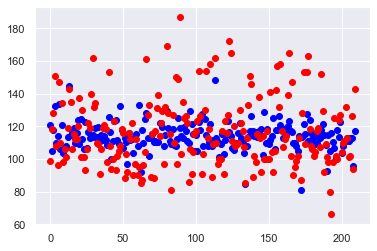

In [450]:
plt.scatter(range(0, len(preds)), preds ,color='blue')
plt.scatter(range(0, len(y_test)), y_test ,color='red') # посмотрели разброс

In [451]:
from sklearn.preprocessing import StandardScaler

In [452]:
sc = StandardScaler() # попробовали нормализировать данные, но всё же особо не меняет по факту 
X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

In [453]:
list(X[0])

[8.1, 2014.0, 333.13, 76.0]

In [454]:
list(sc.fit_transform(X)[0])

[1.4656136255857344,
 0.47085817794460877,
 2.3795765793786647,
 0.9694564665765606]

In [455]:
# добавим параметр нормализации

regressor = Lasso(alpha=0.01) # пробуем Lasso регрессию
regressor.fit(X_train, y_train)
preds2 = regressor.predict(X_test)
mean_absolute_error(y_test, preds2) # абсолютная ошибка почти такая же 

14.256509933840322

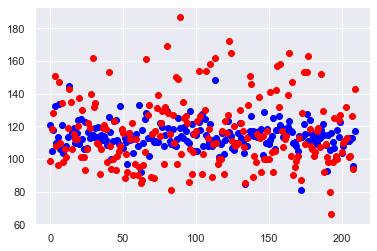

In [456]:
plt.scatter(range(0, len(preds2)), preds2 ,color='blue')
plt.scatter(range(0, len(y_test)), y_test ,color='red') # разброс вообще тот же, по факту совпадают

In [457]:
regressor = ElasticNetCV() # чекаем эластик нет 
regressor.fit(X_train, y_train)
preds3 = regressor.predict(X_test)
mean_absolute_error(y_test, preds3) # не очень работает для этого датасета 

14.311755650578826

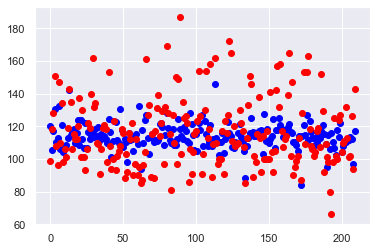

In [458]:
plt.scatter(range(0, len(preds3)), preds3 ,color='blue')
plt.scatter(range(0, len(y_test)), y_test ,color='red') # да и разброс тот же

In [471]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor() # не идёт для такого типа данных... 
fit_data = data1[['Year']] # он вообще не меняет значения, если все убрать, поэтому все и убираем 
X = fit_data.values 
regressor.fit(X_train, y_train) # обучили
preds4 = regressor.predict(X_test)
mean_absolute_error(y_test, preds4) # ошибка видно больше  

17.904761904761905

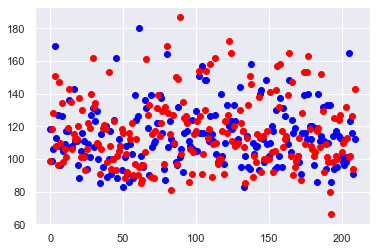

In [472]:

plt.scatter(range(0, len(preds4)), preds4 ,color='blue')
plt.scatter(range(0, len(y_test)), y_test ,color='red') # разброс сильно отличается. Предыдущие регрессоры 
# давали почти одинаковый ответ, т.к. суть очень похожая. Тут вообще другая вещь.